In [26]:
import pandas as pd
import seaborn as sns
import numpy as np 

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [2]:
df = pd.read_csv('datasets-1/BTC-USD.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-14,780.005005,782.033997,776.838989,781.481018,781.481018,75979000
1,2016-12-15,780.070007,781.434998,777.802002,778.088013,778.088013,81580096
2,2016-12-16,778.963013,785.031982,778.963013,784.906982,784.906982,83608200
3,2016-12-17,785.166016,792.508972,784.864014,790.828979,790.828979,78989800
4,2016-12-18,791.007996,794.737000,788.026001,790.530029,790.530029,60524400
...,...,...,...,...,...,...,...
1457,2020-12-10,18553.298828,18553.298828,17957.064453,18264.992188,18264.992188,25547132265
1458,2020-12-11,18263.929688,18268.453125,17619.533203,18058.904297,18058.904297,27919640985
1459,2020-12-12,18051.320313,18919.550781,18046.041016,18803.656250,18803.656250,21752580802
1460,2020-12-13,18806.765625,19381.535156,18734.332031,19142.382813,19142.382813,25450468637


In [14]:
#ne smeeme da gi delime random podatocite - shuffle=False

train = df.iloc[0:int(len(df)*0.8),:] #prvite 80% od redicite gi zimam za treniranje
test = df.iloc[int(len(df)*0.8):,:] # ostanatite 20% za testiranje 

In [15]:
test.shape

(293, 7)

In [20]:
x_train = [] #input features for training 
y_train = []

# 3 dena nanazad - sakame da zememe za posledni 3 dena 
for i in range(len(train) - 3): 
    x = train.iloc[i:(i+3), 4] # gi zima vrednostite od 4ta kolona(target) za poslednite 3 dena do sega 
    y = train.iloc[i+3, 4] # ja zima vrednosta od 4ta kolona za sledniot den (i+3) koja e target vrednosta - Close

    x_train.append(x)
    y_train.append(y)

print(len(y_train))

1166


In [22]:
x_test = []
y_test = []

for i in range(len(test) - 3):
    x = test.iloc[i : (i+3), 4]
    y = test.iloc[i+3, 4]

    x_test.append(x)
    y_test.append(y)

print(len(y_test))

290


In [24]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [29]:
x_train #3 dimenzionalen prostor - moram vo matrica da go pretvroam za LSTM 

array([[[ 781.481018,  778.088013,  784.906982]],

       [[ 778.088013,  784.906982,  790.828979]],

       [[ 784.906982,  790.828979,  790.530029]],

       ...,

       [[9608.475586, 9686.441406, 9663.181641]],

       [[9686.441406, 9663.181641, 9924.515625]],

       [[9663.181641, 9924.515625, 9650.174805]]])

In [31]:
x_train.shape # kolku vkupno ima, koja e prvata dimenzionalnost - 1 vektor e i vo toj vektor ima 3 vrednosti , 

(1166, 1, 3)

In [40]:
model = Sequential()

#vlezen sloj
model.add(LSTM(100, activation='relu', input_shape = (x_train.shape[1], x_train.shape[2]), return_sequences=True )) 

# input,_shape stavam koga LSTM ni e vlezen sloj samo 
#100 nevroni, pa gi zimam od .shape po indeks , return_sequences - da ni ja vrati sekvencata = sakame LSTM da odi vo sleden sloj 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
y_train #go gledam izlezot - ima po 1 vrednost 

array([ 790.828979,  790.530029,  792.713989, ..., 9924.515625,
       9650.174805, 9341.705078])

In [41]:
#hidden sloj 

model.add(LSTM(64, activation='relu'))

In [43]:
#output sloj 

model.add(Dense(1,activation='linear')) #izlezot od y_train i linear zosto e realen broj - linearna 

In [44]:
model.compile(loss='mse',optimizer = 'adam')

In [45]:
history = model.fit(x_train, y_train, batch_size=64, epochs = 30, validation_split=0.2, shuffle=False, verbose = 2) # ne treba da gi mesa podatocite, sakame da se podredeni 

Epoch 1/30
15/15 - 1s - 70ms/step - loss: 44583796.0000 - val_loss: 82242008.0000
Epoch 2/30
15/15 - 0s - 3ms/step - loss: 43083208.0000 - val_loss: 78471944.0000
Epoch 3/30
15/15 - 0s - 3ms/step - loss: 40862892.0000 - val_loss: 73660032.0000
Epoch 4/30
15/15 - 0s - 3ms/step - loss: 37861732.0000 - val_loss: 66483344.0000
Epoch 5/30
15/15 - 0s - 3ms/step - loss: 33190314.0000 - val_loss: 55799396.0000
Epoch 6/30
15/15 - 0s - 3ms/step - loss: 26570708.0000 - val_loss: 41540948.0000
Epoch 7/30
15/15 - 0s - 3ms/step - loss: 18324782.0000 - val_loss: 25277618.0000
Epoch 8/30
15/15 - 0s - 3ms/step - loss: 9829923.0000 - val_loss: 10742956.0000
Epoch 9/30
15/15 - 0s - 3ms/step - loss: 3393535.2500 - val_loss: 2267356.0000
Epoch 10/30
15/15 - 0s - 3ms/step - loss: 599322.6875 - val_loss: 181293.2812
Epoch 11/30
15/15 - 0s - 3ms/step - loss: 249258.2969 - val_loss: 215812.0625
Epoch 12/30
15/15 - 0s - 3ms/step - loss: 269345.1250 - val_loss: 180874.5781
Epoch 13/30
15/15 - 0s - 3ms/step - los

In [46]:
x_test.shape

(290, 1, 3)

In [47]:
y_pred = model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


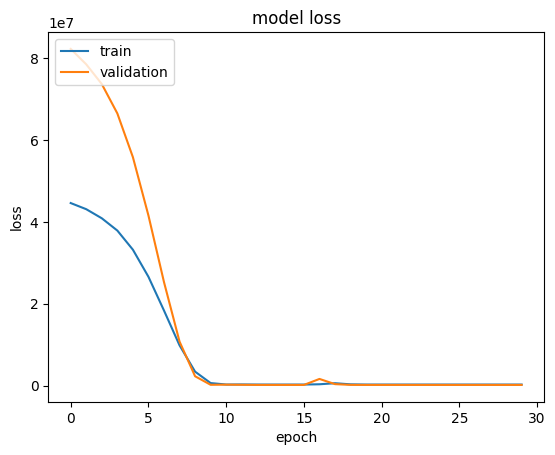

In [48]:
import matplotlib.pyplot as plt

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9805039887410207
302.6716241324354
218274.52239606844
